# Data Analysis Project
Excel  is already uploaded in the repository named as 'myexcel'.

In [5]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the Data

In [10]:
df = pd.DataFrame

In [12]:
df = pd.read_csv('myexcel.csv')

In [38]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


# Preprocessing the Data

In [14]:
df['height'] = np.random.randint(150, 181, size=len(df))

In [16]:
print(df.isnull().sum()) 
df = df.dropna()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
height       0
dtype: int64


In [44]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,height
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0,160
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0,150
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0,151
6,Jordan Mickey,Boston Celtics,55,PF,21,06-Aug,235,LSU,1170960.0,173
7,Kelly Olynyk,Boston Celtics,41,C,25,7-0,238,Gonzaga,2165160.0,151
...,...,...,...,...,...,...,...,...,...,...
451,Chris Johnson,Utah Jazz,23,SF,26,06-Jun,206,Dayton,981348.0,157
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0,180
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0,167
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0,153


# Analyze the Data

In [18]:
team_dist = df['Team'].value_counts()
team_per = (team_dist/len(df))*100

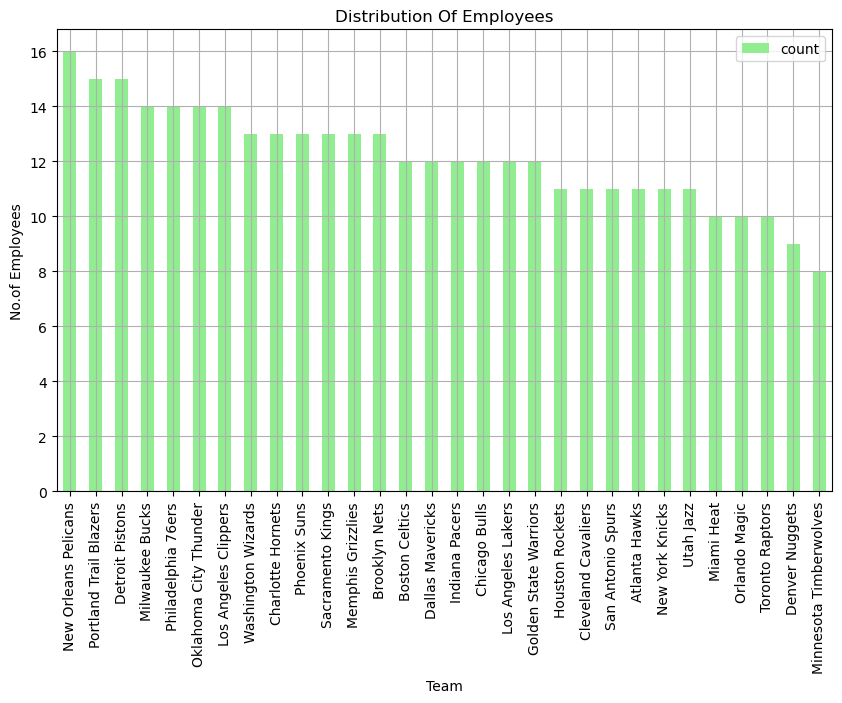

In [30]:
# Barchart : Distribution of employees across each team
plt.figure(figsize = (10,6))
team_dist.plot(kind='bar', color='lightgreen')
plt.xlabel('Team')
plt.ylabel('No.of Employees')
plt.title('Distribution Of Employees')
plt.grid()
plt.legend()
plt.show()

In [70]:
Position_dist = df['Position'].value_counts()

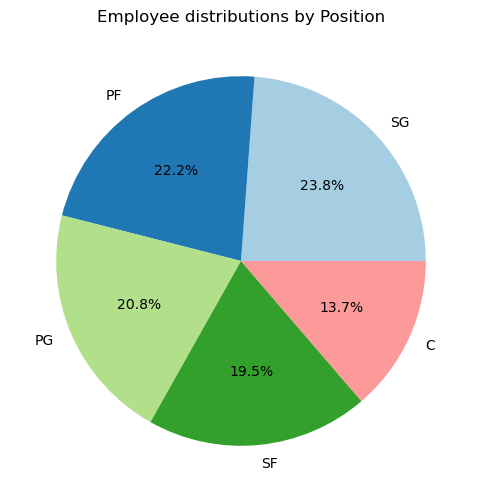

In [84]:
# Pie Chart: Employees based on their positions
plt.figure(figsize = (6,6))
colors = plt.cm.Paired.colors
plt.pie(Position_dist, labels = Position_dist.index, autopct='%1.1f%%',colors = colors)
plt.title('Employee distributions by Position')
plt.show()

In [118]:
bins = [18,25,30,35,40,50]
labels = ['18-25','26-30','31-35','36-40','41-50']
df['Age_group'] = pd.cut(df['Age'],bins=bins,labels=labels,right=False)

C:\Users\91940\AppData\Local\Temp\ipykernel_15636\4009529613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_group'] = pd.cut(df['Age'],bins=bins,labels=labels,right=False)


In [122]:
Age_dist=df['Age_group'].value_counts()

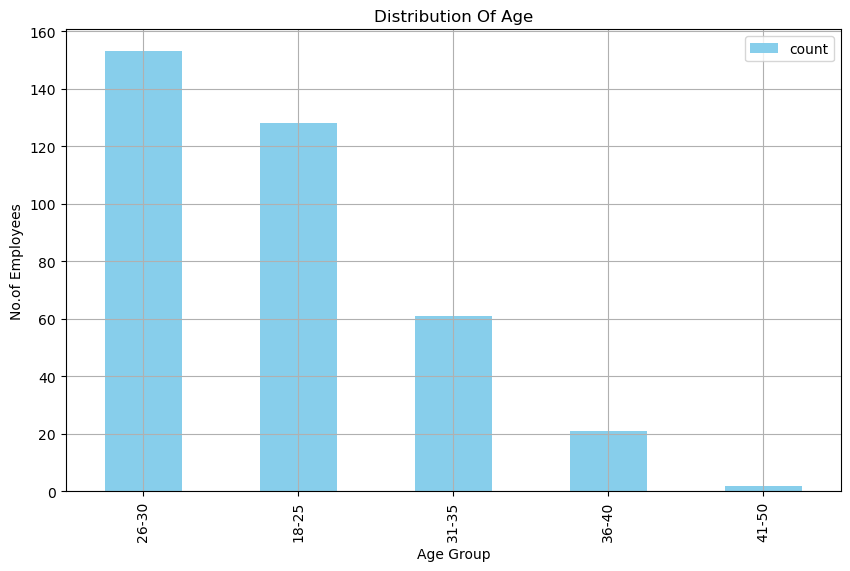

In [124]:
# Barchart : predominant age group among employees
plt.figure(figsize = (10,6))
Age_dist.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('No.of Employees')
plt.title('Distribution Of Age')
plt.grid()
plt.legend()
plt.show()

In [130]:
team_salary = df.groupby('Team')['Salary'].sum()
max_team = team_salary.idxmax()
Position_salary = df.groupby('Position')['Salary'].sum()
max_position = Position_salary.idxmax()

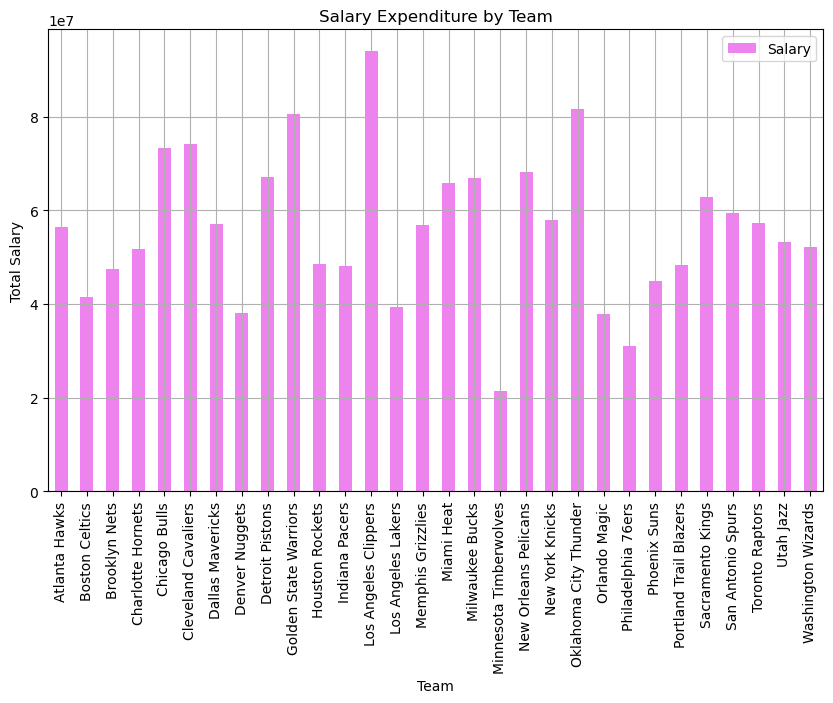

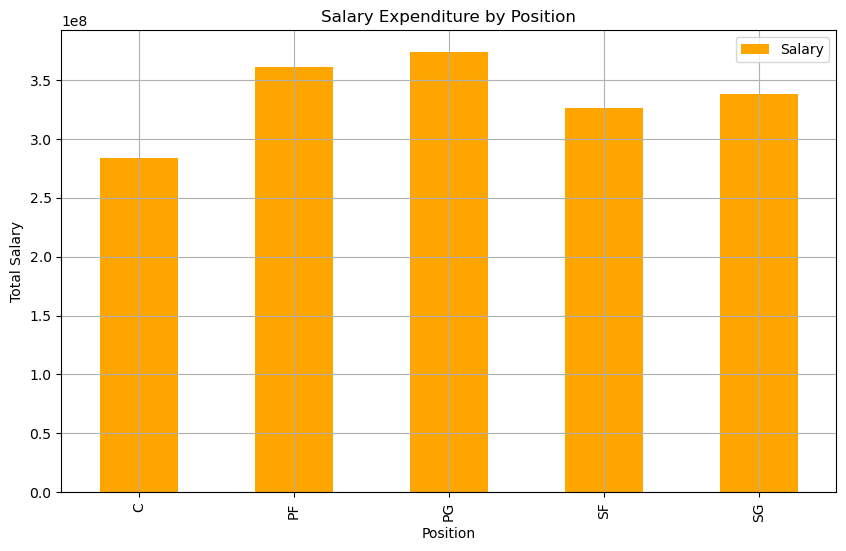

In [146]:
# Barcharts:  Discover which team and position have the highest salary expenditure
plt.figure(figsize = (10,6))
team_salary.plot(kind='bar', color='violet')
plt.xlabel('Team')
plt.ylabel('Total Salary')
plt.title('Salary Expenditure by Team')
plt.grid()
plt.legend()
plt.show()


plt.figure(figsize = (10,6))
Position_salary.plot(kind='bar', color='orange')
plt.xlabel('Position')
plt.ylabel('Total Salary')
plt.title('Salary Expenditure by Position')
plt.grid()
plt.legend()
plt.show()

In [166]:
# correlation between age and salary
correlation = df['Age'].corr(df['Salary'])

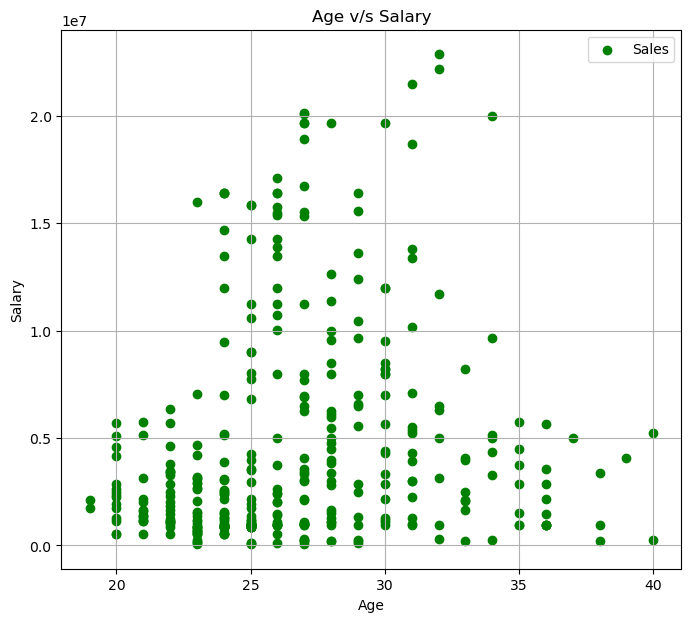

In [168]:
# Scatter Plot: Age v/s Salary
plt.figure(figsize = (8,7))
plt.scatter(df['Age'],df['Salary'], color = 'green', label = 'Sales',marker='o')

plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age v/s Salary')
plt.grid()
plt.legend()
plt.show()

In [32]:
# Conclusion 
# Young workforce (26-30) dominates.
# Majority of employees are aged 26-30, indicating a preference for a younger workforce.
# Salary is more influenced by position than age
# Boston Celtics has the highest employee concentration
# A moderate correlation between age and salary, implying that performance and role significance drive earnings.